# `LU3IN005 PROJET 3`
# Propagation d’une épidémie

L’objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d’une
épidémie dans une population. Votre rendu sera un notebook, il est attendu que les codes soient
commentés et les résultats interprétés.

In [29]:
import matplotlib           # library for creating static, animated and interactive visualizations in Python
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd         # package for high-performance, easy-to-use data structures and data analysis
import numpy as np          # fundamental package for scientific computing with Python

## `1` Description du modèle

<div style="width:600px;float:center;margin:0 10px 10px 0">
    <img src="1.png">
</div>

Dans le modèle SIR , un individu est initialement sain S, peut devenir infecté I puis être guéri
R. La probabilité pour un individu être dans un de ces 3 états au temps t, ne dépend que l’état dans
lequel il est au temps t − 1.<br/><br/>
Un individu dans l’état sain a une probabilité de 0.92 de rester sain et une probabilité de 0.08 de
devenir infecté. Si l’individu est infecté, il peut le rester avec une probabilité de 0.93 et être guéri avec
une probabilité de 0.07. S’il est dans l’état guéri, il reste dans cette état avec une probabilité de 1.<br/><br/>
#### 1. Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états. Vérifiez que cette matrice est stochastique.

$A$ is a marix of size $M \times N$. $A_{(i,j)}$ is the probability of going from $j → i$. $A$ satisfies the following conditions:
$\forall i,j$ $A(i,j) ≥ 0$;
$\forall j$ $\sum_{i=1}^{M} A(i,j) = 1$. Thus $A$ is a Stochastic Matrix.

In [30]:
# transition matrix A of size 3x3
A = np.array([  [0.92,  0,      0],
                [0.08,  0.93,   0],
                [0,     0.07,   1]])
                
if np.any(np.sum(A, axis=0) != 1) or np.any(A < 0):
    print("Transition matrix is not Stochastic.")
else:
    print(A)

[[0.92 0.   0.  ]
 [0.08 0.93 0.  ]
 [0.   0.07 1.  ]]


#### 2. Créez $\pi_0$ la distribution de probabilité initiale. Nous allons regarder l’évolution du nombre d’individu sains, infectés et guéris au cours du temps. Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.<br/>

We note $v_0 = \pi_0$ the probability vector which represents the initial probability distribution, the $i_{th}$ component of $v_0$ represents the probability that the chain starts in state $s_i$.

In [31]:
# v0 is a vector which represents the initial probability distribution
v0 = np.array([0.9, 0.1, 0])

### `1.1` Tirage aléatoire des états
Vous allez générer une séquence de taille T en utilisant cette chaîne de Markov.<br/>Pour générer
une séquence aléatoire:<br/>Choisissiez un état initial au hasard (en utilisant Π0) ;<br/>Puis choisissez les états
suivants en suivant les probabilités de transition (= la matrice de transition A).<br/>
Vous pouvez prendre T=50.

In [32]:
v0_sum = np.cumsum(v0)

def tirage_aleatoire(T):
    """Function that produces a state chain for one individual for a given T."""
    etat_courant = np.argwhere(v0_sum >= rnd.random())[0,0]                 # randomly choosing one of the possible states from v0

    state_chain = [etat_courant]                                            # to store the chain
    for i in range(T):
        transition_prob = np.cumsum(A[:, etat_courant])
        etat_courant = np.argwhere(transition_prob >= rnd.random())[0,0]    # randomly choosing one of the possible states from the current state
        state_chain.append(etat_courant)                                    # add the state to the chain
    return state_chain


np.array(tirage_aleatoire(50))

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

### `1.2` Modélisation d’une population
Vous avez généré une séquence d’état pour un individu. Maintenant vous allez générer un ensemble
de séquence pour une population de 20000 individus. <br/>(Si c’est trop long vous pouvez prendre moins
d’individus.)<br/><br/>
1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et
affichez l’évolution du nombre d’individus dans les trois états en fonction du temps.<br/><br/>
2. Quand t est grand, quel est la proportion d’individus sains, infectés et guéris ?

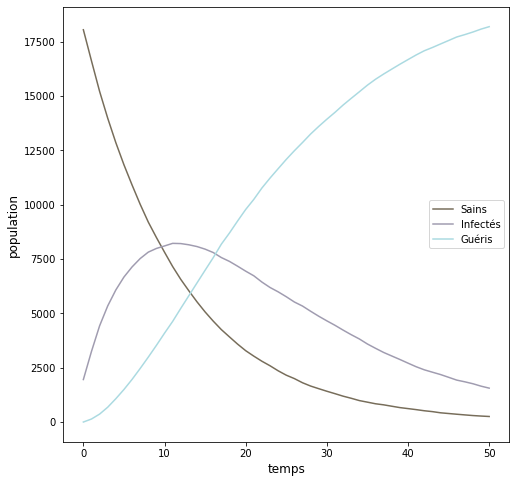

In [33]:
a = np.array([tirage_aleatoire(50) for _ in range(20000)])                  # creates a chain of 50 states for every individual in a population of 20000
count = np.zeros((3, a.shape[1]))                                           # a list of possible states at every t in 0,...,50

def plot_population(T):
    """Function plots the number of individuals in every state (S, I or R) for time T."""
    for j in range(a.shape[1]):                                                 # for every t in 0,...,T
        count[0, j] = len(np.where(a[:,j] == 0)[0])                             # count healthy individuals
        count[1, j] = len(np.where(a[:,j] == 1)[0])                             # count sick individuals
        count[2, j] = len(np.where(a[:,j] == 2)[0])                             # count recovered individuals
    x = [i for i in range(T)]                                                   # for every t in 0,...,T

    plt.figure(figsize=(8,8))
    plt.xlabel('temps', fontsize=12)
    plt.ylabel('population', fontsize=12)
    plt.plot(x, count[0, :], '#776d5a')                                         # plot healthy individuals
    plt.plot(x, count[1, :], '#a09cb0')                                         # plot sick individuals
    plt.plot(x, count[2, :], '#abdae1')                                         # plot recovered individuals
    plt.gca().legend(('Sains','Infectés', 'Guéris'))
    plt.show()

plot_population(51)

### `1.3` Pic de l’épidémie
1. Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [34]:
# max of the number of induviduals in the 1st state (Infected)
np.max(count[1, :])

8219.0

Au pic de l'épidémie, il y a environ $8000$ à $9000$ personnes infectées.

### `1.4` Longueur de l’infection
1. À partir des simulations, estimer la longueur moyenne d’une séquence de I<br/><br/>
2. Calculer théoriquement la longueur d’une séquence de I en fonction de la probabilité de rester
infecté, si on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique).

## `2` Modèle ergodique
Nous allons maintenant considérer un second modèle, les individus guéris peuvent redevenir sains<br/>
avec une probabilité de 0.04. Ils-elles peuvent perdre leur immunité face à la maladie.<br/><br/>
1. Créez la nouvelle matrice de transition, et les nouvelles simulations, comment la population évoluet-elle si un individu guérit peut redevenir infecté ?<br/><br/>
2. Refaire les simulations avec une autre distribution de probabilité initiale, par exemple si au temps<br/>
t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez vos observations.<br/><br/>
3. Quels est la nature des états de cette chaine de Markov ? Est-elle périodique ? Est-elle irréductible ?<br/><br/>
4. Calculer la distribution de probabilité stationnaire à partir de la matrice de transition et comparez ce résultat avec les simulations pour t assez grand.


[[0.92 0.   0.04]
 [0.08 0.93 0.  ]
 [0.   0.07 0.96]]


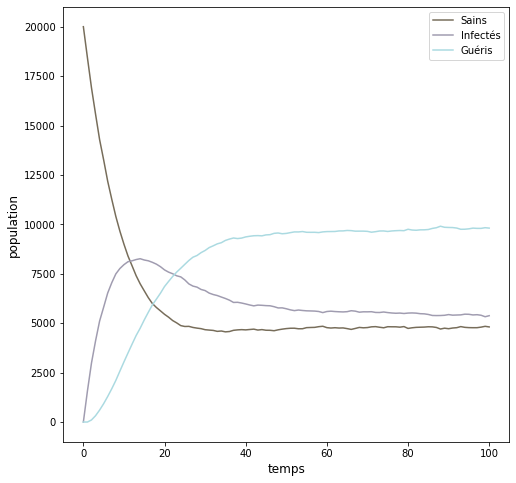

In [35]:
# transition matrix A of size 3x3
A = np.array([  [0.92,  0,      0.04],
                [0.08,  0.93,   0],
                [0,     0.07,   0.96]])
                
if np.any(np.sum(A, axis=0) != 1) or np.any(A < 0):
    print("Transition matrix is not Stochastic.")
else:
    print(A)

# v0 is a vector which represents the initial probability distribution where all individuals are healthy at t=0
v0 = np.array([1, 0, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
a = np.array([tirage_aleatoire(100) for _ in range(20000)])
count = np.zeros((3, a.shape[1]))
A1=A


plot_population(101)

## `3` Modification du modèle : confinement

<div style="width:600px;float:center;margin:0 10px 10px 0">
    <img src="2.png">
</div>

Cette question est indépendant de la question 2. On peut imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de devenir infecté est plus faible.
Nous allons considérer qu’en période de distanciation la probabilité de devenir infecté quand on est un individu sain est de 0.02.<br/><br/>
1. Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Modifiez le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, et comparer les simulations au premier modèle.<br/><br/>
2. Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.<br/>
— Commencer les simulations avec la matrice A. On peut considérer qu’au temps initial tous les individus sont sains.<br/>
— Quand il y a 30% d’individus infectés dans la population, nous passons en période de distanciation, continuer les simulations avec la seconde matrice de transition A2.<br/>
— Le nombre d’individus infectés va décroître. Quand il y a moins de 15% d’infectés, le confinement est levé ; on continue les simulations avec la première matrice A.<br/>

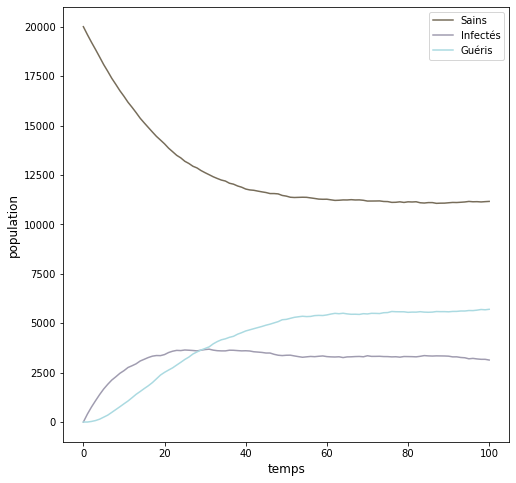

In [36]:
# transition matrix A of size 3x3
A2 = np.array([  [0.98,  0,      0.04],
                [0.02,  0.93,   0],
                [0,     0.07,   0.96]])
                
if np.any(np.sum(A2, axis=0) != 1) or np.any(A2 < 0):
    print("Transition matrix is not Stochastic.")

# v0 is a vector which represents the initial probability distribution where all individuals are healthy at t=0
v0 = np.array([1, 0, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
A = A2
a = np.array([tirage_aleatoire(100) for _ in range(20000)])
count = np.zeros((3, a.shape[1]))

plot_population(101)

In [37]:
def tirage_aleatoire_alterne(T, alterne):
    """Function that produces a state chain for one individual for a given T with alternations of social distancing."""
    etat_courant = np.argwhere(v0_sum >= rnd.random())[0,0]                 

    state_chain = [etat_courant]                                            # to store the chain
    
    current_A = 1
    for i in range(min(alterne, T)):
        if current_A == 1:
            transition_prob = np.cumsum(A1[:, etat_courant])
        else:
            transition_prob = np.cumsum(A[:, etat_courant])

        etat_courant = np.argwhere(transition_prob >= rnd.random())[0,0]    # transition to a state with the highest transition probability
        state_chain.append(etat_courant)                                    # add the state to the chain
        T -= alterne
    return state_chain


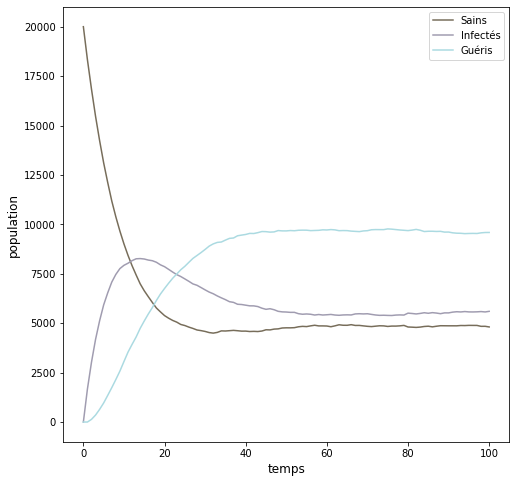

In [38]:
# v0 is a vector which represents the initial probability distribution where all individuals are healthy at t=0
v0 = np.array([1, 0, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
A = A1
a = np.array([tirage_aleatoire(100) for _ in range(20000)])
count = np.zeros((3, a.shape[1]))

plot_population(101)

## `4` Optionnel
Vous pouvez maintenant modifier le(s) modèle(s) pour étudier différents cas de figure :<br/><br/>
1. Vous pouvez modifier <br/>
— la taille de la population ;<br/>
— la distribution de probabilité initiale ;<br/>
— les probabilité de transition pour voir comment cela va affecter la propagation de l’épidémie.<br/><br/>
2. Quelle remarque critique pouvez faire sur le modèle SIR? Proposez-vous des améliorations ?